In [7]:
#require "jupyter-archimedes"
#use "knn.ml"

val k : int ref = {contents = 5}
val set_k : int -> int = <fun>
val vote : 'a list -> 'a = <fun>
val euclidean_distance : float list -> float list -> float = <fun>
val arg_sort : 'a list -> int -> int list = <fun>
val predict : float list list -> float list list -> 'a list -> 'a list =
  <fun>


In [9]:
(* creating a simple training set *)
let train_green = [[5.;15.;];[7.2;14.8];[7.5;17.4;];[6.8;19.0];[3.4;12.2];[9.5;15.];]
let train_blue = [[15.2;8.;];[18.2;6.5];[16.9;3.4;];[14.1;5.0];[13.4;8.1];[19.5;4.9];]
let train_red = [[16.;15.;];[17.2;12.8];[19.5;14.1;];[13.8;17.0];[15.4;11.9];[18.9;19.2];]
let x_train = train_green @ train_blue @ train_red
let y_train = List.init 6 (fun x -> "green") @ List.init 6 (fun x -> "blue") @ List.init 6 (fun x -> "red")


let rec gen_test_values acc lo hi = 
if hi < lo then acc else
gen_test_values ([Random.float 20.; Random.float 20.] :: acc) (lo + 1) hi


let x_test = gen_test_values [] 0 6

(* set k *)
let k = set_k 10

(* get the knn prediction *)
let y_preds = predict x_test x_train y_train

(* pretty print for archimedes *)
let pp_train = List.map (fun x -> ((List.nth x 0),(List.nth x 1))) x_train
let pp_test = List.map (fun x -> ((List.nth x 0),(List.nth x 1))) x_test

val train_green : float list list =
  [[5.; 15.]; [7.2; 14.8]; [7.5; 17.4]; [6.8; 19.]; [3.4; 12.2]; [9.5; 15.]]


val train_blue : float list list =
  [[15.2; 8.]; [18.2; 6.5]; [16.9; 3.4]; [14.1; 5.]; [13.4; 8.1];
   [19.5; 4.9]]


val train_red : float list list =
  [[16.; 15.]; [17.2; 12.8]; [19.5; 14.1]; [13.8; 17.]; [15.4; 11.9];
   [18.9; 19.2]]


val x_train : float list list =
  [[5.; 15.]; [7.2; 14.8]; [7.5; 17.4]; [6.8; 19.]; [3.4; 12.2]; [9.5; 15.];
   [15.2; 8.]; [18.2; 6.5]; [16.9; 3.4]; [14.1; 5.]; [13.4; 8.1];
   [19.5; 4.9]; [16.; 15.]; [17.2; 12.8]; [19.5; 14.1]; [13.8; 17.];
   [15.4; 11.9]; [18.9; 19.2]]


val y_train : string list =
  ["green"; "green"; "green"; "green"; "green"; "green"; "blue"; "blue";
   "blue"; "blue"; "blue"; "blue"; "red"; "red"; "red"; "red"; "red"; "red"]


val gen_test_values : float list list -> int -> int -> float list list =
  <fun>


val x_test : float list list =
  [[1.9501561360729236; 6.10257267727019848];
   [10.4650360392730839; 3.88124155224394807];
   [17.8981954684930784; 8.15325507967469321];
   [6.59212384842788079; 11.854995514649449];
   [9.77150696457804813; 12.7688618120081383];
   [0.552409340871089505; 16.0352181607533];
   [6.21971319688015711; 6.57389446173484693]]


val k : int = 10


val y_preds : string list =
  ["green"; "blue"; "blue"; "green"; "green"; "green"; "green"]


val pp_train : (float * float) list =
  [(5., 15.); (7.2, 14.8); (7.5, 17.4); (6.8, 19.); (3.4, 12.2); (9.5, 15.);
   (15.2, 8.); (18.2, 6.5); (16.9, 3.4); (14.1, 5.); (13.4, 8.1);
   (19.5, 4.9); (16., 15.); (17.2, 12.8); (19.5, 14.1); (13.8, 17.);
   (15.4, 11.9); (18.9, 19.2)]


val pp_test : (float * float) list =
  [(1.9501561360729236, 6.10257267727019848);
   (10.4650360392730839, 3.88124155224394807);
   (17.8981954684930784, 8.15325507967469321);
   (6.59212384842788079, 11.854995514649449);
   (9.77150696457804813, 12.7688618120081383);
   (0.552409340871089505, 16.0352181607533);
   (6.21971319688015711, 6.57389446173484693)]


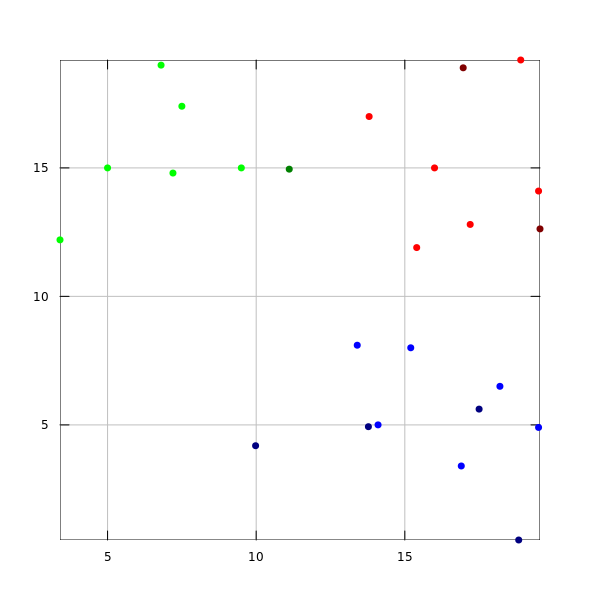

- : unit = ()


In [5]:
(* Plot using Archimedes 
dark colors are the algos prediction
*)
let vp = A. init ~w:600. ~h:600. ["jupyter"] in
    A.Axes.box vp ;
    for i = 0 to pred (List.length pp_train) do 
        let color = List.nth y_train i in
        if color = "red" then
            A.set_color vp A.Color.red ;
        if color = "green" then
            A.set_color vp A.Color.green ;
        if color = "blue" then
            A.set_color vp A.Color.blue ;
        A.List.xy_pairs vp [(List.nth pp_train i)] ;
    done;
    for i = 0 to pred (List.length pp_test) do 
        let color = List.nth y_preds i in
        if color = "red" then
            A.set_color vp (A.Color.rgb 0.5 0. 0.) ;
        if color = "green" then
            A.set_color vp (A.Color.rgb 0. 0.5 0.) ;
        if color = "blue" then
            A.set_color vp (A.Color.rgb 0. 0. 0.5) ;
        A.List.xy_pairs vp [(List.nth pp_test i)] ;
    done;
    A.close vp